# Projeto 3

Neste projeto, foi analisado a popularidade de um filme baseado nos atores que estão nele.

In [1]:
import pandas as pd
import statsmodels.api as sm

a = 400

In [2]:
data1 = pd.read_csv('tmdb_5000_credits.csv')
data2 = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
data_credits = data1.set_index('title')
data_movie = data2.set_index('title')

Primeiramente, 'bricamos' um pouco com os dados para ver se existe alguma relação entre dados que n podemos ver intuitivamente.

In [4]:
data_credits.head(3)

,movie_id,cast,crew
title,,,
Avatar,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
Pirates of the Caribbean: At World's End,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
Spectre,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [5]:
data_movie.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,
Avatar,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
Pirates of the Caribbean: At World's End,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
Spectre,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466


In [6]:
data = data_credits.join(data_movie, how="inner")

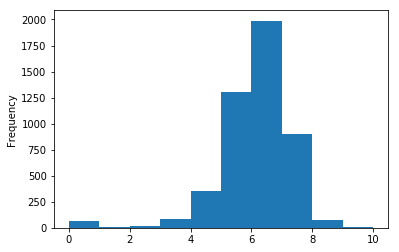

In [7]:
data.vote_average.plot.hist()

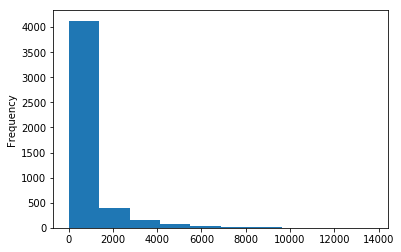

In [8]:
data.vote_count.plot.hist()

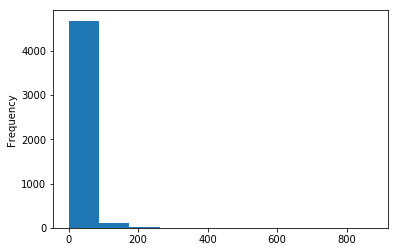

In [9]:
data.popularity.plot.hist()

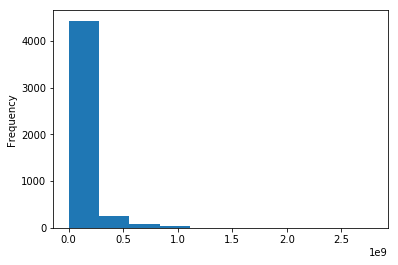

In [10]:
data.revenue.plot.hist()

pode-se ver que a maioria dos filmes tem uma nota acima de 6, porém temos poucos filmes com a popularidade muito alta 

Nesta parte foi dado o joint nos 2 dataframes importados para melhor manuseamento e depois foi feita a filtragem dos dados indesejaveis para melhor análise, gerando o df, que sera usado para nossa regressão.

In [11]:
data.head(3)

,movie_id,cast,crew,budget,genres,homepage,id,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
#Horror,301325,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...","[{""credit_id"": ""545bbac70e0a261fb6002329"", ""de...",1500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",http://www.hashtaghorror.com/,301325,[],de,#Horror,...,"[{""name"": ""AST Studios"", ""id"": 75277}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-11-20,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Death is trending.,3.3,52
(500) Days of Summer,19913,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...","[{""credit_id"": ""52fe47f99251416c750abaa5"", ""de...",7500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://500days.com,19913,"[{""id"": 248, ""name"": ""date""}, {""id"": 572, ""nam...",en,(500) Days of Summer,...,"[{""name"": ""Fox Searchlight Pictures"", ""id"": 43...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-07-17,60722734,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,It was almost like falling in love.,7.2,2904
10 Cloverfield Lane,333371,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...","[{""credit_id"": ""57627624c3a3680682000872"", ""de...",15000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",http://www.10cloverfieldlane.com/,333371,"[{""id"": 1930, ""name"": ""kidnapping""}, {""id"": 23...",en,10 Cloverfield Lane,...,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-10,108286421,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Monsters come in many forms.,6.8,2468


Filtragem de Dados


In [12]:
df = data[['cast', 'popularity', 'vote_average']]
df.sort_values(by="popularity", ascending=False).head(5)

,cast,popularity,vote_average
title,,,
Minions,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...",875.581305,6.4
Interstellar,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...",724.247784,8.1
Deadpool,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...",514.569956,7.4
Guardians of the Galaxy,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...",481.098624,7.9
Mad Max: Fury Road,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...",434.278564,7.2


Para podermos saber quais atores fizeram quais filmes, pegamos o dicionario da coluna 'cast' e o transformamos em um dataframe. Deste dataframe, pôde se tirar o número de filmes que cada ator fez.

In [13]:
cast_total = []

for l in df.iterrows():
    lista_dic = eval(l[1]["cast"])
    for dic in lista_dic:
        dic["movie"] = l[0]
    cast_total.extend(lista_dic)


In [14]:
d = pd.DataFrame.from_records(cast_total)
dados = d[['character', 'movie', 'name']]

In [15]:
dados.head(6)

,character,movie,name
0,Alex's 12-Step Friend,#Horror,Taryn Manning
1,Sam's Mom,#Horror,Natasha Lyonne
2,Alex Cox,#Horror,Chloë Sevigny
3,Mr. Cox,#Horror,Balthazar Getty
4,Dr. White,#Horror,Timothy Hutton
5,Lisa,#Horror,Lydia Hearst


In [16]:
x = dados.name.value_counts()
x.head(15)

Samuel L. Jackson    67
Robert De Niro       57
Bruce Willis         51
Matt Damon           48
Morgan Freeman       46
Steve Buscemi        43
Liam Neeson          41
Johnny Depp          40
Owen Wilson          40
John Goodman         39
Alec Baldwin         39
Nicolas Cage         39
Willem Dafoe         38
Stanley Tucci        38
Jim Broadbent        38
Name: name, dtype: int64

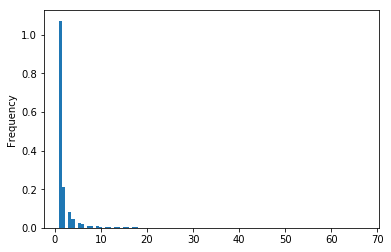

In [17]:
x.plot.hist(density=True, bins=100)

Podemos ver neste histograma que o numero de filmes por ator é bem desproporcional

Com a tabela de atores por filmes montada, foi inserida no dataframe principal uma coluna por ator (achamos relevante pegar atores somente com 18 filmes feitos ou mais para que ele tivesse alguma relevância no filme) que tem em suas linhas 0 para os filems que não participou e 1 para os que sim.

In [18]:
atores = list(dados.name.value_counts().head(a).index)

In [19]:
for i in atores:
    df[i] = 0
    
df

for i in dados.itertuples():
    if i.name in df.columns:
        
        df.loc[i.movie, i.name] = 1

C:\Users\pvfon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
df

,cast,popularity,vote_average,Samuel L. Jackson,Robert De Niro,Bruce Willis,Matt Damon,Morgan Freeman,Steve Buscemi,Liam Neeson,...,Demi Moore,Max von Sydow,Zeljko Ivanek,Anna Paquin,Margo Martindale,Joe Chrest,Danny McBride,John Hawkes,James Rebhorn,Robin Wright
title,,,,,,,,,,,,,,,,,,,,,
#Horror,"[{""cast_id"": 0, ""character"": ""Alex's 12-Step F...",2.815228,3.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
(500) Days of Summer,"[{""cast_id"": 4, ""character"": ""Tom Hansen"", ""cr...",45.610993,7.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Cloverfield Lane,"[{""cast_id"": 2, ""character"": ""Michelle"", ""cred...",53.698683,6.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Days in a Madhouse,"[{""cast_id"": 2, ""character"": ""Nellie Bly"", ""cr...",0.489271,4.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Things I Hate About You,"[{""cast_id"": 2, ""character"": ""Patrick Verona"",...",54.550275,7.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102 Dalmatians,"[{""cast_id"": 1, ""character"": ""Cruella de Vil"",...",9.895061,5.1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10th & Wolf,"[{""cast_id"": 1, ""character"": ""Tommy"", ""credit_...",3.942464,6.3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11:14,"[{""cast_id"": 10, ""character"": ""Jack"", ""credit_...",15.048067,6.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12 Angry Men,"[{""cast_id"": 29, ""character"": ""Juror 8"", ""cred...",59.259204,8.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
dados.to_excel("atuacoes.xlsx")
dados.name.value_counts().to_excel("contagem.xlsx")
df.to_excel('dataframe uhul.xlsx')

Para que a regressão fosse feita, foi separada a entreda e a saída, filtrando o df para que seja analisado somente oque queriamos que são os atores.    

In [22]:
colunas = list(df.columns)
indesejaveis = ['cast', 'popularity', 'vote_average']

for i in indesejaveis:
    colunas.remove(i)

In [23]:
entrada = df.loc[:, colunas]

In [24]:
entrada

,Samuel L. Jackson,Robert De Niro,Bruce Willis,Matt Damon,Morgan Freeman,Steve Buscemi,Liam Neeson,Johnny Depp,Owen Wilson,John Goodman,...,Demi Moore,Max von Sydow,Zeljko Ivanek,Anna Paquin,Margo Martindale,Joe Chrest,Danny McBride,John Hawkes,James Rebhorn,Robin Wright
title,,,,,,,,,,,,,,,,,,,,,
#Horror,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
(500) Days of Summer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Cloverfield Lane,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10 Days in a Madhouse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10 Things I Hate About You,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102 Dalmatians,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10th & Wolf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11:14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12 Angry Men,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
out = df['popularity']
out.head(10)

title
#Horror                        2.815228
(500) Days of Summer          45.610993
10 Cloverfield Lane           53.698683
10 Days in a Madhouse          0.489271
10 Things I Hate About You    54.550275
102 Dalmatians                 9.895061
10th & Wolf                    3.942464
11:14                         15.048067
12 Angry Men                  59.259204
12 Rounds                     15.661350
Name: popularity, dtype: float64

A regressão foi feita usando a funsão OLS do statsmodel

In [26]:
def regress(X,Y):
    model = sm.OLS(Y,X)
    results = model.fit()
    return results

In [27]:
var = regress(entrada, out)

In [28]:
var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     11.00
Date:                Thu, 22 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:08:50   Log-Likelihood:                -22701.
No. Observations:                4809   AIC:                         4.620e+04
Df Residuals:                    4409   BIC:                         4.879e+04
Df Model:                         400                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Samuel L. Jackson          1.0661      3.833      0.278      0.781      -6.448       8.580
Robert De Niro            10.3439      4.071      2.541      0.011       2.362      18.326
Bruce Willis              17.2656      4.317      3.999      0.000       8.802      25.729
Matt Damon                22.5246      4.606      4.891      0.000      13.495      31.554
Morgan Freeman            21.7033      4.633      4.684      0.000      12.620      30.787
Steve Buscemi              3.9348      4.934      0.797      0.425      -5.739      13.609
Liam Neeson               19.0189      4.834      3.935      0.000       9.543      28.495
Johnny Depp               19.6814      4.973      3.958      0.000       9.932      29.431
Owen Wilson               -1.3689      5.259     -0.260      0.795     -11.680       8.942
John Goodman               9.4700      4.891      1.936      0.053      -0.119      19.059
Alec Baldwin               4.2809      4.889      0.876      0.381      -5.303      13.865
Nicolas Cage               6.7533      4.876      1.385      0.166      -2.807      16.313
Willem Dafoe               0.0003      5.083   5.64e-05      1.000      -9.965       9.966
Stanley Tucci              9.2293      5.153      1.791      0.073      -0.873      19.331
Jim Broadbent              0.8957      5.056      0.177      0.859      -9.016      10.807
Brad Pitt                 21.7100      5.095      4.261      0.000      11.721      31.699
Paul Giamatti              8.8302      5.019      1.759      0.079      -1.009      18.669
Will Ferrell              -7.8061      5.389     -1.449      0.148     -18.371       2.758
Susan Sarandon             1.0961      5.060      0.217      0.828      -8.823      11.016
Richard Jenkins           -2.9240      5.155     -0.567      0.571     -13.031       7.183
Bill Murray               11.4362      5.209      2.196      0.028       1.225      21.648
J.K. Simmons               8.4033      5.289      1.589      0.112      -1.966      18.772
Christopher Walken         3.2219      5.183      0.622      0.534      -6.939      13.383
Keith David                3.4847      5.135      0.679      0.497      -6.582      13.552
Justin Long               -5.6183      5.447     -1.031      0.302     -16.298       5.061
Michael Shannon            2.4522      5.207      0.471      0.638      -7.756      12.661
Robin Williams             8.6848      5.226      1.662      0.097      -1.560      18.930
Bill Hader                10.4397      5.788      1.804      0.071      -0.908      21.787
George Clooney             0.5675      5.538      0.102      0.918     -10.289      11.424
David Koechner           -10.9577      5.394     -2.031      0.042     -21.532      -0.383
Jack Black                 8.1874      5.440      1.505      0.132      -2.477  

Feita essa regressão, podemos ver localizar as variáveis que tem seu valor P muito alto e filtra-las para um melhor funcionamento do modelo

Interessante notar que, os atores que fizeram muitos filmes, tem valor P alto, poruq e a chance de este ator ter feito tanto filmes bons quanto ruins é grande

In [29]:
pv_altos = list(var.pvalues.sort_values(ascending=False)[0:300].index)

In [30]:
colunas = list(df.columns)
indesejaveis = ['cast', 'popularity', 'vote_average']

for i in pv_altos:
    indesejaveis.append(i)
    
for i in indesejaveis:
    colunas.remove(i)

entrada = df.loc[:, colunas]

out = df['popularity']

var = regress(entrada, out)

In [31]:
var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     38.49
Date:                Thu, 22 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:08:50   Log-Likelihood:                -22929.
No. Observations:                4809   AIC:                         4.606e+04
Df Residuals:                    4709   BIC:                         4.670e+04
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Robert De Niro           13.5837      3.908      3.476      0.001       5.923      21.245
Bruce Willis             20.4230      4.103      4.977      0.000      12.379      28.467
Matt Damon               25.5710      4.320      5.919      0.000      17.102      34.040
Morgan Freeman           25.5269      4.373      5.837      0.000      16.953      34.100
Liam Neeson              21.2825      4.621      4.606      0.000      12.224      30.341
Johnny Depp              25.5043      4.752      5.367      0.000      16.189      34.820
John Goodman             13.7823      4.704      2.930      0.003       4.560      23.005
Brad Pitt                22.7491      4.803      4.736      0.000      13.333      32.166
Bill Murray              14.1570      4.948      2.861      0.004       4.458      23.857
David Koechner           -5.0027      5.097     -0.982      0.326     -14.994       4.989
Ben Kingsley             14.2411      5.002      2.847      0.004       4.436      24.046
Sigourney Weaver         23.3797      5.090      4.593      0.000      13.401      33.359
Brian Cox                12.0871      5.109      2.366      0.018       2.071      22.103
Laurence Fishburne       18.9231      5.089      3.718      0.000       8.945      28.901
Frank Welker             19.7509      5.374      3.675      0.000       9.215      30.287
Tom Cruise               24.9730      5.193      4.809      0.000      14.793      35.153
John Hurt                24.7397      5.205      4.753      0.000      14.536      34.943
Sylvester Stallone       14.4609      5.194      2.784      0.005       4.278      24.644
Tom Hanks                29.4032      5.207      5.647      0.000      19.196      39.611
Arnold Schwarzenegger    28.8909      5.215      5.540      0.000      18.667      39.115
Harrison Ford            18.6833      5.289      3.533      0.000       8.315      29.052
Cameron Diaz             24.8333      5.257      4.724      0.000      14.528      35.139
John Travolta            16.1688      5.331      3.033      0.002       5.717      26.620
Robert Duvall            14.6650      5.336      2.748      0.006       4.204      25.126
Kristen Wiig             19.5927      5.596      3.501      0.000       8.622      30.563
Matthew McConaughey      24.1607      5.444      4.438      0.000      13.488      34.833
Allison Janney           27.8880      5.477      5.092      0.000      17.150      38.625
Michael Caine            34.5609      5.523      6.258      0.000      23.734      45.388
Ed Harris                15.8940      5.397      2.945      0.003       5.314      26.474
Jason Statham            24.9909      5.522      4.525      0.000      14.165      35.817
Sean Connery             17.7575      5.475      3.243      0.001       7.024      28.491
Adam Sandler           

Com essa regressão final, podemos ver que mesmo com o $r^2$ um pouco mais baixo, ele continua alto e as variáveis agora tem um valor P muito menor, melhorando a regressão